# Problem Statement

The high readmission level of hospital patients after they are discharged from the hospital is a significant concern for the health care system. The estimated cost of hospital readmissions is about $17.4 billion annually. While some readmissions are due to normal medical complications, such high readmission rates are generally viewed as symptomatic of deeper problems in the health care system, namely potential quality problems within hospitals, lack of coordination in follow-up care after discharge, and misaligned financial incentives to discharge patients early (see Reference: https://www.cms.gov/Medicare/Medicare-Fee-forServicePayment/AcuteInpatientPPS/Readmissions-Reduction-Program ).

To address the problem, the 2010 Affordable Care Act established a hospital readmissions reduction program (HRRP). The program created financial incentives for hospitals to reduce readmissions by linking Medicare reimbursements to a hospital’s risk-adjusted readmission rate. 
The initial phase of the HRRP, focused on three conditions: 
- Acute myocardial infarction (AMI), 
- heart failure (HF), 
- Pneumonia

Hospitals that had a three-year rolling readmission rate for these conditions that exceeded their risk adjusted target were to be penalized a portion of their Medicare reimbursements. 
For 2012, penalties could be as much 1\% of the total reimbursements a hospital received for the three target conditions. 
In the first year of the program, 2225 hospitals were subject to reduced payment penalties, with  penalties totaling $225 million nationwide. The maximum penalties were set to increase to 3% of reimbursements by 2014.

Approximately 20% of healthcare systems provider were insurance reimbursements from Medicare for the three conditions (acute myocardial infarction, heart failure, and pneumonia) covered by the HRRP.
 A significant portion of the healthcare systems provider’s revenue could be at risk due to HRRP penalties.
The concern over the impact of HRRP penalties over the coming years, healthcare systems providers started to look into the hospitals readmission rate within 30 days to come up them with a good strategy. 

Data on all admissions over the last three years for patient is provided with data dictionary. What insights you could glean from the data and what recommendations you could make. 

## Data Dictionary

- age: Age at time of admission
- female: 1 = Female, 0=Male
- flu_season: Flu Season (1 = Yes). Admission starting December through March
- ed_admit: Admitted through the ED (1 = Yes).
- severity score: Generic physiologic severity of illness score based on lab tests and vital signs
- comorbidity score: Severity score based on patients’ pre-existing diagnoses.
- readmit30: Indicator for hospital readmission within 30 days. 1 if readmitted, 0 otherwise.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score


# Data Set

In [2]:
df=pd.read_csv('readmission.csv')
df.head()

,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


In [3]:
df.dtypes

age                  int64
female               int64
flu_season           int64
ed_admit             int64
severity score       int64
comorbidity score    int64
readmit30            int64
dtype: object

In [4]:
df.rename(columns = {'severity score':'severity_score', 'comorbidity score': 'comorbidity_score'}, inplace = True)


In [5]:
df.dtypes

age                  int64
female               int64
flu_season           int64
ed_admit             int64
severity_score       int64
comorbidity_score    int64
readmit30            int64
dtype: object

In [6]:
df.female.unique()

array([1, 0], dtype=int64)

In [7]:
df.flu_season.unique()

array([1, 0], dtype=int64)

In [8]:
df.ed_admit.unique()

array([1, 0], dtype=int64)

In [9]:
df.readmit30.unique()

array([0, 1], dtype=int64)

In [10]:
df.age.nunique()

41

In [11]:
df.describe()

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,76.847330,0.469192,0.408033,0.809220,22.353263,94.735509,0.227750
std,7.904949,0.499107,0.491525,0.392961,18.005320,57.145155,0.419428
min,65.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,70.000000,0.000000,0.000000,1.000000,8.000000,51.000000,0.000000
50%,76.000000,0.000000,0.000000,1.000000,19.000000,86.000000,0.000000
75%,82.000000,1.000000,1.000000,1.000000,32.000000,131.000000,0.000000
max,105.000000,1.000000,1.000000,1.000000,112.000000,322.000000,1.000000


 ### what percentage of  patients readmited in 30 days?

In [12]:
df['readmit30'].value_counts(normalize = True)

0    0.77225
1    0.22775
Name: readmit30, dtype: float64

**22.78% of the patients were readmitted within 30 days**

### Is there dependency between readmition in 30 days and Flu season at 95% confidence level? 

<AxesSubplot:xlabel='readmit30', ylabel='count'>

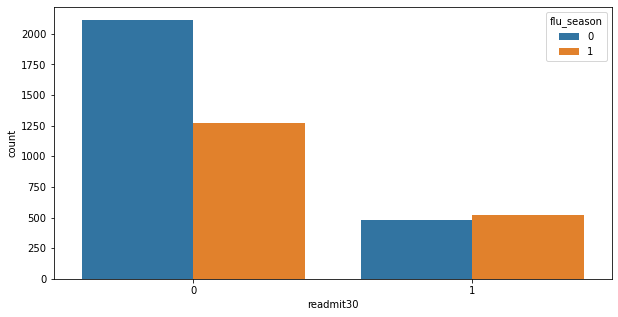

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x='readmit30',hue='flu_season',data=df)


**Looking at the bar graph at first sight it seems more patients got readmitted during the flu season.**

In [14]:
stat, p, dof, expected = chi2_contingency(df)
alpha = 0.05

print("chi-saure test value is " + str(stat.round(2)), "  and  ","p value is " + str(p))
if p <= alpha:
    print('Reject H0: Patient no-show depends on flu season')
else:
    print('Fail to reject H0: Patient no-show does not depends on flu season')


chi-saure test value is 131592.27   and   p value is 0.0
Reject H0: Patient no-show depends on flu season


# Logistic Regression
1. Apply proper data pre-processing based on the discussion in the class
2. Split data to train and test set 
3. Use Training dataset to fit Logistic Regression
4. Comment on significance of predictors
5. Comment on main driver(s)
6. Interpret the effect of sex and comorbidity score on the 30 days readmition  
7. Use testset and comment on performance of the model (confusion matrix) at .5 threshold 
8. Use testset and comment on performance of the model (confusion matrix) at optimal threshold 

# KNN Classification
1. Apply proper data pre processing based on the discussion in the class
2. Split data to train and test set 
3. Apply cross validation using train set to find optimal number of neighbours 
4. Use testset and comment on performance of the model (confusion matrix) at .5 threshold 
5. Use testset and comment on performance of the model (confusion matrix) at optimal threshold 

# Compare KNN and Logistic regression prediction power using ROC/AUC/F1 Score 

# Provide business insight from your data and models to reduce readmission rate 

In [15]:
df2 = df.copy(deep = True)

In [16]:
scaler = StandardScaler()
df2["age"]=scaler.fit_transform(df2[['age']])
df2.dtypes

age                  float64
female                 int64
flu_season             int64
ed_admit               int64
severity_score         int64
comorbidity_score      int64
readmit30              int64
dtype: object

In [17]:
# Select features to be used for training model
features = ['age','female','flu_season','ed_admit','severity_score','comorbidity_score']

X=df2[features].values
y=df2['readmit30'].values

# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1,stratify=y)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (3067, 6)
Number transactions y_train dataset:  (3067,)
Number transactions X_test dataset:  (1315, 6)
Number transactions y_test dataset:  (1315,)


In [18]:
df_train=pd.DataFrame(np.column_stack((X_train, y_train)),columns = features+['readmit30'])
df_train['readmit30']=df_train['readmit30'].astype(int)

df_test=pd.DataFrame(np.column_stack((X_test, y_test)),columns = features+['readmit30'])
df_test['readmit30']=df_test['readmit30'].astype(int)

df_test
#colmns=['age']
#for col in colmns:
       # df_train[col]=df_train[col].astype('float')
        #df_test[col]=df_test[col].astype('float')

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
0,-0.992824,0.0,1.0,0.0,1.0,128.0,1
1,-0.866307,0.0,0.0,1.0,13.0,76.0,0
2,1.537525,1.0,1.0,0.0,6.0,95.0,0
3,-0.486754,1.0,0.0,1.0,81.0,160.0,1
4,-1.119342,0.0,0.0,1.0,47.0,164.0,0
...,...,...,...,...,...,...,...
1310,0.145833,1.0,0.0,1.0,77.0,49.0,0
1311,0.778420,1.0,1.0,1.0,46.0,131.0,0
1312,-0.107202,0.0,1.0,1.0,57.0,185.0,1
1313,-1.372377,0.0,0.0,1.0,22.0,89.0,0


In [19]:
formula = 'readmit30 ~ age+female+flu_season+ed_admit+severity_score+comorbidity_score'

model = smf.glm(formula = formula, data=df_train, family=sm.families.Binomial(link= sm.families.links.logit()))

result_GLM = model.fit()
print(result_GLM.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              readmit30   No. Observations:                 3067
Model:                            GLM   Df Residuals:                     3060
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1315.6
Date:                Sat, 15 Oct 2022   Deviance:                       2631.3
Time:                        21:17:37   Pearson chi2:                 2.97e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1939
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.9916      0.18

### Looking at the results of the logistic regression we can interpret the following.

### Females are approximately 10% (e^0.0986 = 1.10) more likely to be readmitted within 30 days from first visit, however, this result is statistically insignificant as it has a p value of greater than 0.05. 

### Patients admitted during flu season have predicted odds of being readmitted within 30 days are 2.22 times as high as patients admitted outside the flu season. This is consistent with our observation from the bar graph earlier as is satistically significant.   

### With an increase of 1 unit in the severity score the risk of readmission increases by 2%. This result is statistically significant to with a p value of less than 0.05 and also what we expect intuitively.

### With an increase of 1 unit in the comorbidity score the risk of readmission increase by 1.7%. This result is statistically significant to with a p value of less than 0.05 and also what we expect intuitively.

### With an increase in the age of the patient by 1 unit the risk of being readmitted decreases by about 2%. This result is statistically insignificant with a huge p value. This also makes sense intuitively as we expect older patients to be at a greater risk of readmission. This result may be due to a correlation amongst the explanatory variables for example there may be a correlation between age and severity score. 

### Patients admitted through the emergency department have predicted odds of being readmitted 0.88 times that of someone who was not admitted through the emergnecy department. This result is also statistically insignificant perhaps due to collinearity between the explanatory variables. 



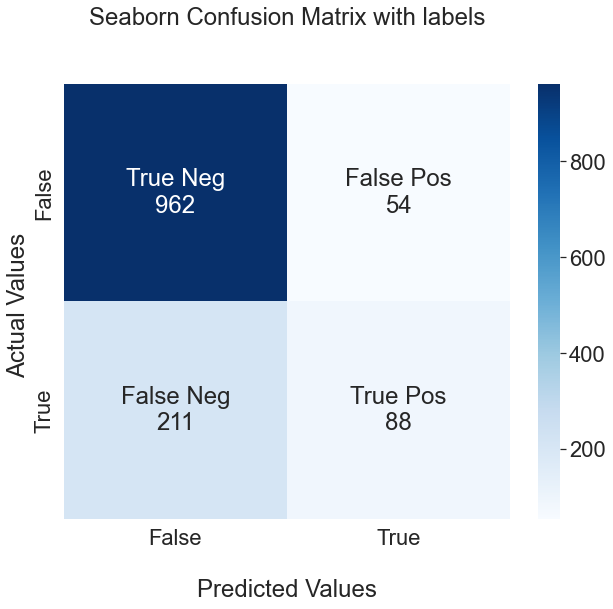

Precision: 0.62
Recall: 0.29
Accuracy: 0.8
F1-score: : 0.4


In [20]:
predictions = result_GLM.predict(df_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]

#############Plot confusion matrix
cf_matrix=confusion_matrix(df_test["readmit30"],  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)

print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

Area under the ROC curve : 0.755909


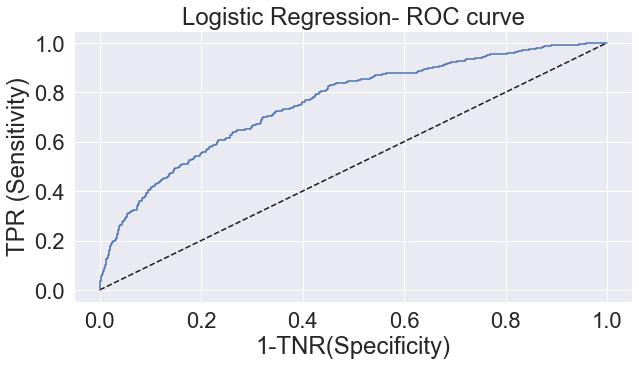

In [21]:
fpr, tpr, thresholds =roc_curve(df_test["readmit30"], predictions)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('1-TNR(Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('Logistic Regression- ROC curve')
plt.show()

          fpr       tpr     1-fpr  difference  thresholds
0    0.000000  0.000000  1.000000   -1.000000    1.943216
1    0.000000  0.003344  1.000000   -0.996656    0.943216
2    0.000000  0.016722  1.000000   -0.983278    0.901809
3    0.000984  0.016722  0.999016   -0.982293    0.895601
4    0.000984  0.036789  0.999016   -0.962226    0.850258
..        ...       ...       ...         ...         ...
416  0.943898  0.993311  0.056102    0.937209    0.037994
417  0.943898  0.996656  0.056102    0.940553    0.037738
418  0.959646  0.996656  0.040354    0.956301    0.033208
419  0.959646  1.000000  0.040354    0.959646    0.033077
420  1.000000  1.000000  0.000000    1.000000    0.016812

[421 rows x 5 columns]
          fpr       tpr     1-fpr  difference  thresholds
244  0.317913  0.685619  0.682087    0.003532    0.211935


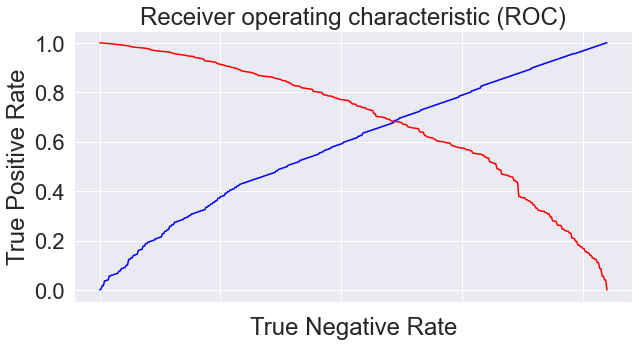

In [22]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'difference' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc)
##
print(roc.iloc[(roc.difference-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(roc['tpr'],color='blue')
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
ax.set_xticklabels([])
plt.savefig('ROC_optimal.png')


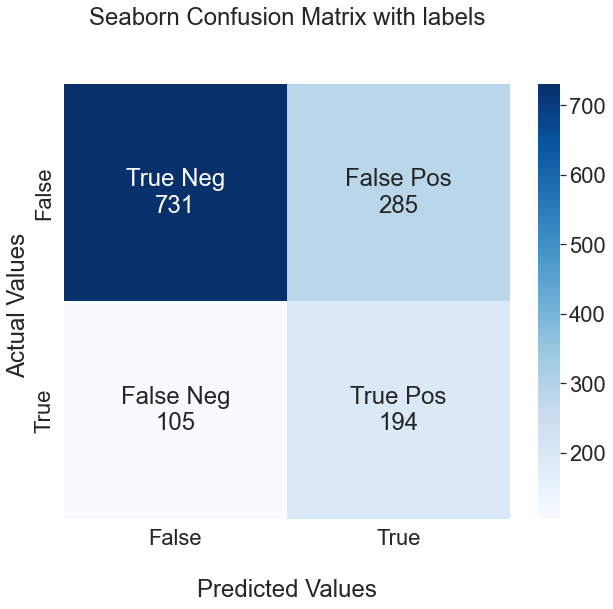

Precision: 0.41
Recall: 0.65
Accuracy: 0.7
F1-score: : 0.5


In [23]:
predictions_nominal = [ 0 if x < 0.230354 else 1 for x in predictions]


#############Plot confusion matrix
cf_matrix=confusion_matrix(df_test["readmit30"],  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

# KNN

In [24]:
cols=['age','female','flu_season','ed_admit','severity_score','comorbidity_score']
df3 = pd.get_dummies(df[cols])


scaler = StandardScaler()
df4 = pd.DataFrame(scaler.fit_transform(df[['age']],),columns=['age'])

X = df3.reset_index(drop=True).merge(df4.reset_index(drop=True), left_index=True, right_index=True)

y=df['readmit30']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
X_test

,age_x,female,flu_season,ed_admit,severity_score,comorbidity_score,age_y
146,69,0,1,0,1,128,-0.992824
2564,70,0,0,1,13,76,-0.866307
2880,89,1,1,0,6,95,1.537525
3367,73,1,0,1,81,160,-0.486754
1875,68,0,0,1,47,164,-1.119342
...,...,...,...,...,...,...,...
865,78,1,0,1,77,49,0.145833
2327,83,1,1,1,46,131,0.778420
1106,76,0,1,1,57,185,-0.107202
1701,66,0,0,1,22,89,-1.372377


In [27]:
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors using 5-fold cross validation
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)


In [28]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

[Text(0.5, 0, ''), Text(1.5, 0, '')]

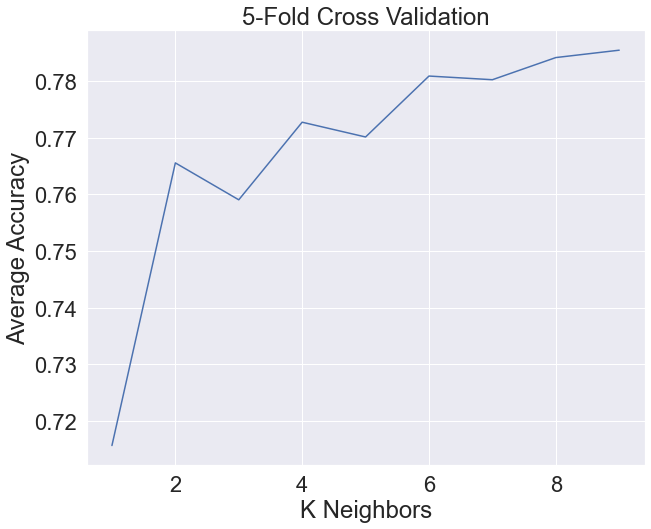

In [29]:
k_fold_result = pd.DataFrame()
k_fold_result['k'] = np.arange(1, 10)
k_fold_result['mean_test_score'] = list(knn_gscv.cv_results_['mean_test_score'])
plt.plot(k_fold_result['k'],k_fold_result['mean_test_score'])
plt.xlabel('K Neighbors')
plt.ylabel('Average Accuracy')
plt.title('5-Fold Cross Validation')
ax.set_xticklabels([])

In [30]:
print('Best parameters: Number of neighbors is ', knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors (mean accuracy)
print('Model accuracy (score) is:' , knn_gscv.best_score_)


Best parameters: Number of neighbors is  {'n_neighbors': 9}
Model accuracy (score) is: 0.7854626416778698


In [31]:
y_pred_proba = knn_gscv.predict_proba(X_test)[:,1]

Area under the ROC curve : 0.690097


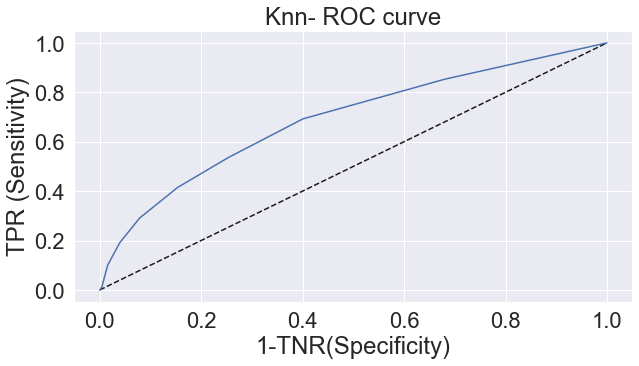

In [32]:
y_test = y_test.astype(int)
fpr, tpr, thresholds =roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('1-TNR(Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('Knn- ROC curve')
plt.show()

In [33]:
predictions = knn_gscv.predict(X_test)

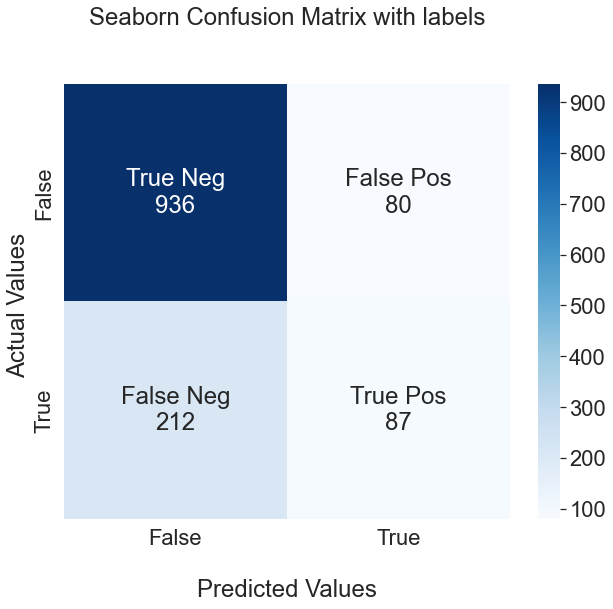

Precision: 0.41
Recall: 0.65
Accuracy: 0.7
F1-score: : 0.5


In [34]:
#############Plot confusion matrix
cf_matrix=confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

In [35]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'difference' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc)

print(roc.iloc[(roc.difference-0).abs().argsort()[:1]])

         fpr       tpr     1-fpr  difference  thresholds
0   0.000000  0.000000  1.000000   -1.000000    2.000000
1   0.000984  0.000000  0.999016   -0.999016    1.000000
2   0.004921  0.016722  0.995079   -0.978356    0.888889
3   0.015748  0.100334  0.984252   -0.883918    0.777778
4   0.039370  0.190635  0.960630   -0.769994    0.666667
5   0.078740  0.290970  0.921260   -0.630290    0.555556
6   0.153543  0.414716  0.846457   -0.431741    0.444444
7   0.252953  0.535117  0.747047   -0.211930    0.333333
8   0.400591  0.692308  0.599409    0.092898    0.222222
9   0.680118  0.852843  0.319882    0.532961    0.111111
10  1.000000  1.000000  0.000000    1.000000    0.000000
        fpr       tpr     1-fpr  difference  thresholds
8  0.400591  0.692308  0.599409    0.092898    0.222222


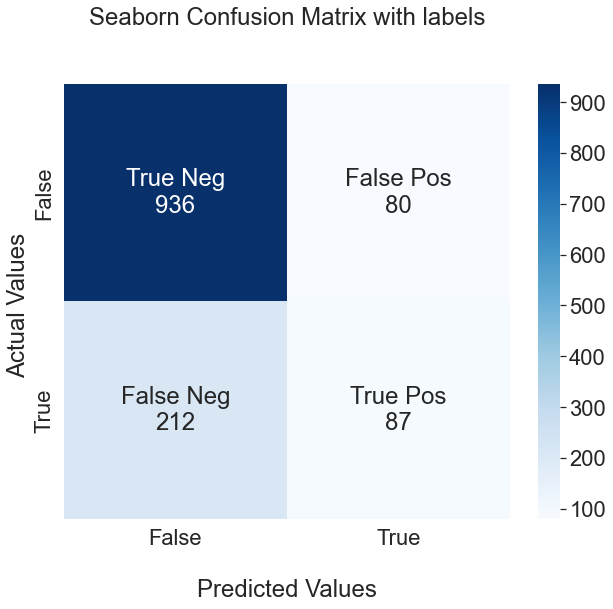

Precision: 0.52
Recall: 0.29
Accuracy: 0.78
F1-score: : 0.37


In [36]:
predictions_nominal = [ 0 if x < 0.222222 else 1 for x in predictions]


#############Plot confusion matrix
cf_matrix=confusion_matrix(df_test["readmit30"],  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))